<h3 style="text-align: center;"> Statistical Learning Lab3</h3>
<h5 style="text-align: center;"> Wenjie Hu 343312</h5>


### Problem 1
**Prove that the trace of the symmetric real matrix is equal to the sum of its eigenvalues** $tr(\Lambda)=\sum\limits_{i=1}^n \lambda$.
$$A=P \Lambda P^{-1}$$
$$tr(A)=tr(P\Lambda P^{-1})=tr(\Lambda P^{-1}P)=tr(\Lambda)=\sum\limits_{i=1}^n \lambda_n$$

### Problem 2
**Consider the real matrix X of the dimension $n$ x $p$.**  
**1. Prove that X'X is semipositive definite and that its eigenvalues are larger or equal to zero.**

To prove that $X'X$ is positive semidefinite, we consider a vector $v\in \mathbb{R}^p$, then we have:
$$v' (X'X)v =(Xv)'(Xv)=\sum\limits_{i=1}^{n}(Xv)_i^2 \geq 0$$
since the sum of squares of real number is always nonnegative, hence:
$$v'(X'X)v\geq 0$$
which means that $X'X$ is positive semidefinite.

**2. Prove that when p>n than at least one eigenvalue of X'X is equal to zero. (i.e. X’X is singular).**

The $X$ is an $n \times p$ matrix and $p\gt n$, so we have 
$$rank(X')=rank(X)\leq n \Rightarrow rank(X'X)\leq min(rank(X'), rank(X)) = rank(X) \leq n$$
Since $X'X$ is a $p \times p$ matrix and $p\gt n$, we have $(X'X)\leq n \lt p$, this means $X'X$ cannot be of full rank $p$, Therefore $X'X$ has at least $p=n$ zero eigenvalues, because the number of nonzero eigenvalues of a matrix cannot exceed its rank.

### Problem 3
**We have a data contains 10 variables and we fit 10 regression models including the first variable, the first two variables etc. The residual sums of squares for these 10 consecutive models are equal to (1731, 730, 49, 38.9, 32, 29, 28.5 27.8, 27.6, 26.6). The sample size is equal to 100. Which of these 10 models will be selected by AIC ? And which model will be selected by BIC or RIC? Assume that the standard deviation of the error term is known; $\sigma$ = 1**


The sample size n is given as 100, $\sigma = 1$, $log(100)\approx 4.605$
- **AIC**: 
$$ AIC(k) = RSS_k + 2k\sigma^2$$
$$ AIC(k) = RSS_k + 2k$$

- **BIC**:
$$ BIC(k) = RSS_k + k \ln (n)\sigma^2 $$
$$ BIC(k) = RSS_k + k \cdot 4.605$$

Then we calculate the  AIC and BIC values for each of the 10 models:
<center>

| Model | RSS  | AIC = RSS + 2k | BIC = RSS + 4.605k |
|-------|------|----------------|--------------------|
| 1     | 1731 | 1733           | 1735.605           |
| 2     | 730  | 734            | 739.21             |
| 3     | 49   | 55             | 62.815             |
| 4     | 38.9 | 46.9           | 57.32              |
| 5     | 32   | 42             | 53.025             |
| 6     | 29   | 41             | 56.63              |
| 7     | 28.5 | 42.5           | 60.735             |
| 8     | 27.8 | 43.8           | 64.84              |
| 9     | 27.6 | 45.6           | 68.945             |
| 10    | 26.6 | 46.6           | 73.05              |
</center>

Thus, AIC selects the model with the minimum AIC value, which is the model with 6 variables, having an AIC value of 41.
BIC selects the model with the minimum BIC value, which is the model with 5 variables, having a BIC value of approximately 53.025.


### Problem 4
**Assuming the orthogonal design $(X'X = I)$ and $n=p=10000$ calculate the expected number of false discoveries for AIC, BIC and RIC, when none of the variables is really important (i.e. $p_0 = p$).**

**AIC** Using a significance cutoff corresponding to a two-tailed p-value of 0.05, the critical value is $|z|>1.96$. The probability of a false positive is given by $2 \times (1-\Phi(1.96))\approx 0.05$. when $n=p=1000$, the expected number of false discoveries is $0.05 \times 10000 = 500$   

For **BIC**, the expected number of false discoveries is given by $10000 * 2(1-\Phi(\sqrt{10000})) \approx 10000* 0.00241  \approx 2.4$  

**RIC** has a stronger penalty, the inclusion threshold would be even more stringent than BIC, resulting in potentially near-zero false discoveries  $10000 * 2(1-\Phi(\sqrt{2log10000})) \approx 10000* 0.000017  \approx 0.17$


### Problem 5
**When would you use AIC? BIC? RIC?**

When we would like to have better predictive accuracy, especially when model size isn’t a big concern, we choose AIC. Use BIC when we need to balance fit and complexity, especially when we want to avoid overfitting in large datasets. When we want to strictly avoid overfitting and false positives, RIC is the best option; it is ideal in high-dimensional data like genomics.

### Problem 6
**Derive the formula for the bias, variance and mse of the ridge regression estimate under the orthogonal design (i.e when $X’X=I$). Compare to the respective values for the least square estimator**

We consider the linear model $ y = X\beta + \epsilon $, where:
- $ y $ is the $ n \times 1 $ response vector.
- $ X $ is the $ n \times p $ design matrix with orthogonal columns, so $ X'X = I $.
- $ \beta $ is the $ p \times 1 $ vector of true coefficients.
- $ \epsilon $ is the $ n \times 1 $ vector of errors, with $ \mathbb{E}[\epsilon] = 0 $ and $ Var(\epsilon) = \sigma^2I $.

and the ridge regression estimator: $ \hat{\beta}_{ridge} = (X'X + \lambda I)^{-1}X'y $, where $ \lambda $ is the regularization parameter.

Under Orthogonal Design ($X'X = I$)

- For ridge regression:
$$ \hat{\beta}_{ridge} = (I + \lambda I)^{-1}X'y = \frac{1}{1+\lambda}X'y $$

- For OLS:
$$ \hat{\beta}_{OLS} = (X'X)^{-1}X'y = X'y $$

**Bias**
- Ridge Regression: 
$$ Bias(\hat{\beta}_{ridge}) = \mathbb{E}[\hat{\beta}_{ridge}] - \beta = \frac{1}{1+\lambda}X'X\beta - \beta = \frac{1}{1+\lambda}\beta - \beta = -\frac{\lambda}{1+\lambda}\beta $$  
- OLS:
 $$ Bias(\hat{\beta}_{OLS}) = \mathbb{E}[\hat{\beta}_{OLS}] - \beta = \beta - \beta = 0 $$

**Variance**
- Ridge Regression:
 $$ Var(\hat{\beta}_{ridge}) = \frac{1}{(1+\lambda)^2}Var(X'y) = \frac{\sigma^2}{(1+\lambda)^2}I $$

- OLS:
 $$ Var(\hat{\beta}_{OLS}) = Var(X'y) = \sigma^2I $$

**MSE**
- Ridge Regression:
 $$ MSE(\hat{\beta}_{ridge}) 
 = Bias(\hat{\beta}_{ridge})^2 + Var(\hat{\beta}_{ridge}) 
 = \left(\frac{\lambda^2}{(1+\lambda)^2}\right)\|\beta\|^2 + \frac{\sigma^2}{(1+\lambda)^2} $$

- OLS:
 $$ MSE(\hat{\beta}_{OLS}) = Bias(\hat{\beta}_{OLS})^2 + Var(\hat{\beta}_{OLS}) = \sigma^2(X'X)^{-1} = \sigma^2I$$

conclusion:
For the bias, Ridge regression introduces bias in exchange for reduced variance, especially when $ \lambda $ is large. The variance of the ridge estimator is smaller than that of the OLS estimator, scaled down by $\frac{1}{(1+\lambda)^2}$. For MSE, as we discuss before, Ridge regression trades off increased bias for reduced variance, which can result in a lower overall MSE, the OLS is unbiased, but in some higher variance cases, the MSE of OLS may increases higher.

### Problem 7
**For a given data set with 40 explanatory variables the residual sums of squares from the least squares method and the ridge regression are equal to : 4.5 and 11.6, respectively. For the ridge regression the trace of $X(X'X + \gamma I)^{−1} X'$ is equal to 32. Which of these two methods yields the better estimated prediction error.**

As we know, the residual sums of squares from the least squares method are 4.5 and for ridge regression, 11.6; the degrees of freedom for ridge regression are approximated by the trace of the matrix $X(X'X+\lambda I)^{-1}X'$. For OLS, the degrees of freedom are simply the number of variables, which is 40. Then, we can calculate the estimated prediction error for both models based on $\hat{P}E = RSS + 2\sigma^{2}p$. Since $\sigma^2$ is unknown, we can compare the models based on the formula $\hat{P}E \approx RSS + 2 \times degrees\ of\ freedom$:  
OLS:
$$\hat{P}E_{OLS} =RSS_{OLS}+ 2*40= 4.5* 80= 84.5$$
Ridge regression:
$$\hat{P}E_{ridge} = RSS_{ridge} + 2 * 32 = 11.6+64  = 75.6$$
From the calculations above, despite having a higher residual sum of squares, the ridge regression model has a lower estimated prediction error when considering both the fit and the complexity of the model (75.6 vs. 84.5). Thus, ridge regression yields a better estimated prediction error in this case.




### Problem 8
**Given $X'X=I$ calculate the expected value of false discoveries and the power of LASSO.**

False Discoveries (expected value):
- The LASSO tends to not shrink truly non-zero coefficients to zero in the orthogonal case.
- The expected value of false discoveries depends on the choice of penalty $\lambda$ and the noise level $ \sigma $. Generally, lower $ \lambda $ values increase the risk of false positives.

Power (probability of correctly identifying non-zero coefficients):
- In the orthogonal case, power is high because there's no shrinkage of non-zero coefficients due to the lack of correlation among predictors.

### Problem 9
**Consider adaptive LASSO with λi = wiλ.**

**i) How can you calculate adaptive LASSO estimator using the numerical solver for LASSO(like glmnet)**

To use a numerical solver like `glmnet` for adaptive LASSO:
 **Set the penalty weights**: $ \lambda_i = w_i \lambda $.
Input these weights into the solver, which will adjust the penalty for each coefficient based on these weights.

 **ii) In the orthogonal case (X’X=I) calculate the value of the adaptive LASSO estimator for the specific coordinate of the beta vector.**

If $ X'X = I $:  
The LASSO estimator would simply apply a soft-thresholding rule:
$ \hat{\beta_i} = \text{sign}(\hat{\beta_i}^{OLS}) \max(|\hat{\beta_i}^{OLS}| - \lambda, 0) $

 **iii) The ordinary least squares estimator of β1 under the orthognal design (X’X=I) is equal to 3 and the LASSO estimator of this parameter is equal to 2. What is the value of the adaptive LASSO estimator of β1 if we use the same value of λ and the weight for X1 is $w_1 = 1/4$**

Given:
- $ \hat{\beta_1}^{OLS} = 3 $
- $ \hat{\beta_1}^{LASSO} = 2 $
- $ w_1 = \frac{1}{4} $

**Adaptive LASSO**:
- Penalty for $ \beta_1 $: $ \lambda_1 = \frac{1}{4} \lambda $
- If $ \lambda = |\hat{\beta_1}^{OLS} - \hat{\beta_1}^{LASSO}| = |3 - 2| = 1 $
- Thus, $ \lambda_1 = 0.25 $

Estimator:
$$ \hat{\beta_1}^{AL} = \text{sign}(3) \max(|3| - 0.25, 0) = \max(2.75, 0) = 2.75 $$

The value of the adaptive LASSO estimator of $ \beta_1 $ is $ 2.75 $.

### Project1

##### 1. The data set Lab3.Rdata contains the matrix xx with expressions of 300 genes for 210 individuals.

**a) Preprocess the data by standardizing each gene expression such that its mean is preserved but the standard deviation is equal to 1.**

we standardize the data and show the first 5 rows of date

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,1.543700,-0.8136279,-0.63442403,0.0250797661,0.1797980,-0.21320842,0.32554779,0.33642683,1.3851350,1.975775,⋯,0.19797392,-0.60909366,-0.8904307,-0.7792694,-0.8804287,1.2385920,-0.978905529,0.7745010,1.5155365,0.1430975
NA06993,1.379893,-0.7178879,-0.09136441,0.4052641825,0.5367274,-0.30778614,0.39479114,0.08371120,0.8895464,1.346209,⋯,0.26646277,-0.51302174,-1.3754314,-1.1107829,-0.5686128,0.9495139,-0.270315914,0.7942432,0.8078035,-0.3829534
NA07022,1.438081,-0.6006803,-0.08394002,0.0001899472,0.6539953,-0.59627018,0.68631928,0.07004591,1.2487015,2.038646,⋯,-0.33546705,0.02284704,-1.0363154,-0.6410519,-0.2167788,0.9598225,-0.272151126,0.5970845,1.2267982,-0.5389261
NA07034,1.489181,-0.4520390,-0.35744462,0.2717351578,0.6833310,-0.13750907,0.72519681,0.38010935,0.9528681,1.903886,⋯,-0.46328034,-0.12128450,-0.9122458,-0.6895398,-0.3122274,0.6902553,-0.615244392,0.1035161,1.0464362,-0.6447329
NA07055,1.650934,-0.5417405,0.18789621,0.2814621598,0.4975862,-0.64284033,0.25429681,0.39894017,0.6609621,1.655420,⋯,-0.05050971,-0.25408286,-1.0810093,-1.0059990,-0.5704555,0.8295987,-0.194014618,0.5927771,0.8747763,-0.1914374
NA07056,1.311004,-0.9340028,-0.29942111,0.1113627835,-0.1728013,0.04260929,-0.07232948,0.30667950,1.1809229,1.779113,⋯,-0.08639086,-0.11126795,-0.5098959,-0.3801591,-0.1664537,1.0971042,-0.002270544,1.0796663,1.3027283,0.6946147


**b) The average expression level over all genes is close to 10. Subtract 10 from all standardized gene expressions, such that the new standardized gene expressions oscillate around zero**

Subtract 10 from each element in the matrix and show the first 5 rows of data.

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,-8.456300,-10.81363,-10.634424,-9.974920,-9.820202,-10.213208,-9.674452,-9.663573,-8.614865,-8.024225,⋯,-9.802026,-10.609094,-10.89043,-10.77927,-10.88043,-8.761408,-10.97891,-9.225499,-8.484464,-9.856902
NA06993,-8.620107,-10.71789,-10.091364,-9.594736,-9.463273,-10.307786,-9.605209,-9.916289,-9.110454,-8.653791,⋯,-9.733537,-10.513022,-11.37543,-11.11078,-10.56861,-9.050486,-10.27032,-9.205757,-9.192196,-10.382953
NA07022,-8.561919,-10.60068,-10.083940,-9.999810,-9.346005,-10.596270,-9.313681,-9.929954,-8.751298,-7.961354,⋯,-10.335467,-9.977153,-11.03632,-10.64105,-10.21678,-9.040177,-10.27215,-9.402915,-8.773202,-10.538926
NA07034,-8.510819,-10.45204,-10.357445,-9.728265,-9.316669,-10.137509,-9.274803,-9.619891,-9.047132,-8.096114,⋯,-10.463280,-10.121284,-10.91225,-10.68954,-10.31223,-9.309745,-10.61524,-9.896484,-8.953564,-10.644733
NA07055,-8.349066,-10.54174,-9.812104,-9.718538,-9.502414,-10.642840,-9.745703,-9.601060,-9.339038,-8.344580,⋯,-10.050510,-10.254083,-11.08101,-11.00600,-10.57046,-9.170401,-10.19401,-9.407223,-9.125224,-10.191437
NA07056,-8.688996,-10.93400,-10.299421,-9.888637,-10.172801,-9.957391,-10.072329,-9.693321,-8.819077,-8.220887,⋯,-10.086391,-10.111268,-10.50990,-10.38016,-10.16645,-8.902896,-10.00227,-8.920334,-8.697272,-9.305385


**c) Use the first five individuals to estimate the vector of the means for the "standardized" gene expressions. Use the maximum likelihood estimator and both James-Stein estimators (shrunk towards zero and towards a common mean). Which σ2 should you use when calculating the James-Stein estimators?**

In this case, $\sigma^2$ is estimated using the variance of the gene data from the first five individuals. This approach helps us tailor the shrinkage in our estimators very closely to the data we're actually working with. By focusing on this specific subset, our estimators can potentially be more precise, because they're directly linked to the characteristics of the data we're using.

**d) verify the accuracy of these estimators by comparing them to the average gene expressions for the remaining 205 individuals.** 

Lets analysis the plot, ideally, all points in the scatter plot should lie on the identity line. The closer the points to this line, the better the accuracy of the estimator.
When we compare the squared error values. Lower values indicate more accurate estimators, as we can see, the James-Stein estimators can outperform MLE under certain conditions due to shrinkage, especially when n is large or the true parameter values are close to each other or the shrinkage target.


<center>

| Method                       | Squared Error |
|------------------------------|---------------|
| MLE        | 7.474385      |
| James-Stein Zero | 10.3338    |
| James-Stein Common Mean | 4.017367  |

</center>

Squared Error for MLE: 7.474385 
Squared Error for James-Stein Zero: 10.3338 
Squared Error for James-Stein Common Mean: 4.017367 


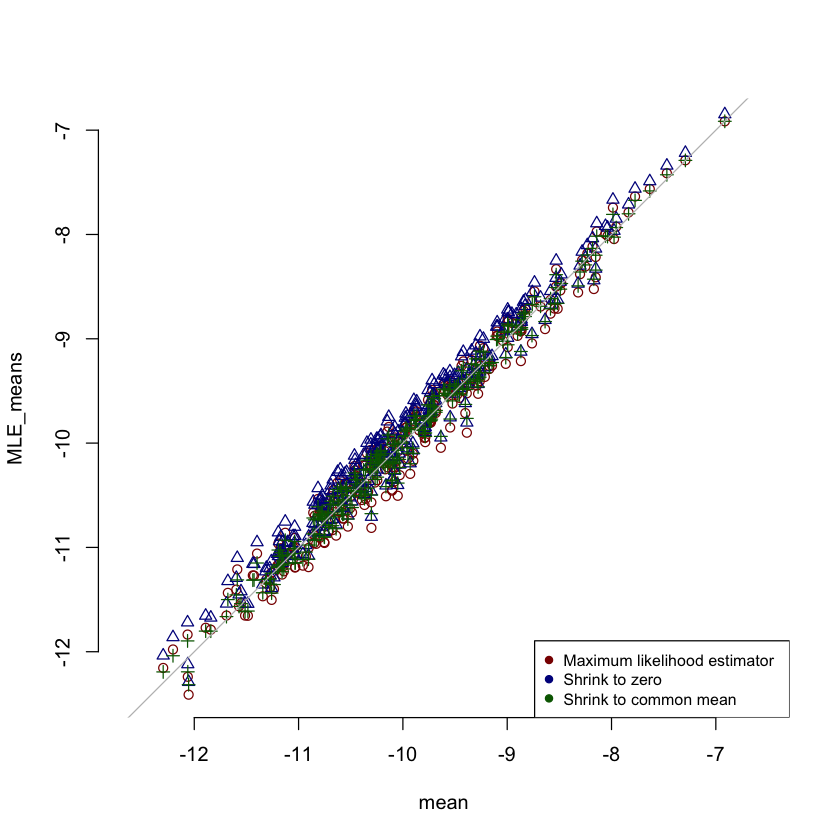

##### 2. Generate the design matrix $X_{1000×950}$ such that its elements are iid random variables from $N (0, \sigma = \sqrt{\frac {1}{1000}} )$. Then generate the vector of the response variable according to the model $Y = X\beta + \epsilon$, where $\beta = (3, 3, 3, 3, 3, 0, . . . , 0)^T$ and $\epsilon ∼ N (0, I)$.
i) 2 first variables  
ii) 5 first variables  
iii) 10 first variables  
iv) 100 first variables  
v) 500 first variables  
vi) all 950 variables  
For each of the considered models:  

**a) Estimate $ \beta $ with the Least Squares method and calculate residual sum of squares and the conditional (given $ \hat{\beta} $) expected value of the prediction error $ PE = E||X(\beta - \hat{\beta}) + \epsilon^* ||^2 = || X(\beta - \hat{\beta}) +n\sigma^2 $. Here $ \epsilon^* \sim N(0, I) $ is a new noise vector, independent of the training sample.**

**b) Use the residual sum of squares to estimate $P E$ assuming that $\sigma$ is known and replacing $\sigma$ with its regular unbiased estimator.**

**c) Estimate $P E$ using leave-one-out cross-validation
$CV  =\sum_{i=1}^n(Y_i - \hat{Y}[i])^2 =\sum_{i=1}^n(\frac{Y_i - \hat{Y_i}}{1-M_{ii}})^2$**

The result of the experiment we presented below

<center>

|        | RSS            | RSS_PE       | Sigma_PE     | LOOCV_PE     |
|--------|----------------|--------------|--------------|--------------|
| Model 1| 1053.2349610029| 1050.85288655| 1055.3456523 | 1057.5540341 |
| Model 2| 1002.8362275015| 1020.23653174| 1007.8756055 | 1012.8920206 |
| Model 3| 1036.2246354049| 1124.45583150| 1046.6915509 | 1056.9204759 |
| Model 4| 950.10561977336| 1086.62962508| 1055.6729108 | 1171.4148865 |
| Model 5| 462.68994557916| 1397.35895630| 925.37989115 | 1847.9115109 |
| Model 6| 69.144339236044| 1813.55381817| 1382.8867847 | 27174.4499438|

</center>

[[1]]
     RSS   RSS_PE Sigma_PE LOOCV_PE 
986.9166 988.2209 988.8944 990.5962 

[[2]]
      RSS    RSS_PE  Sigma_PE  LOOCV_PE 
 967.0349 1012.8395  971.8944  976.7070 

[[3]]
     RSS   RSS_PE Sigma_PE LOOCV_PE 
958.7112 985.1608 968.3952 978.1924 

[[4]]
     RSS   RSS_PE Sigma_PE LOOCV_PE 
1022.680 1102.290 1136.311 1261.161 

[[5]]
      RSS    RSS_PE  Sigma_PE  LOOCV_PE 
 488.9003 1434.5676  977.8007 1957.1844 

[[6]]
        RSS      RSS_PE    Sigma_PE    LOOCV_PE 
   61.11948  2036.38200  1222.38955 25664.10087

**d) Which model is best in terms of $P E$? How well is $P E$ estimated by the three estimators? Which model would you choose using these estimators?**

The model with 5 vars appears to be the best in terms of balancing fit and prediction error. It has a relatively low RSS and one of the lower LOOCV_PE values, suggesting good generalization capability without too much complexity.  
LOOCV_PE seems to be the most reliable estimator among the three for gauging how well the models will perform on unseen data, as it accounts for model complexity and overfitting by evaluating the model’s performance on each data point one at a time.
PE and Sigma_PE provide necessary information but do not sufficiently penalize model complexity, making them less effective for models with many predictors.

Based on these estimators, choosing the model with 5 vars would be the best.

**e) Repeat the above calculations 30 times and for each of the considered models compare the boxplots of $\hat{PE} − P E$ for three estimates of $P E$, mentioned above. Comment on thresults referring to the theory learned in class**

We repeat the experiment 30 times, the average results are shown below. Models with 2, 5,10, and 100 variables exhibit relatively stable and low prediction errors, suggesting good model performance without overfitting. 
The models with 500 and especially 950 variables seem to be overfitting. This is clear because they have really low RSS_PE but much higher LOOCV_PE, especially the one with 950 predictors. It looks like these models are picking up noise instead of actual patterns in the data, and they don't do well on new data.

<center>

| Model           | RSS_PE | Sigma_PE | LOOCV_PE |
|-----------------|--------|----------|----------|
| 2 vars    |  989.0 |    991.0 |    993.0 |
|  5 vars    |  992.0 |    997.0 |   1002.0 |
|  10 vars   |  989.0 |    999.0 |   1009.0 |
|  100 vars  |  898.0 |    998.0 |   1109.0 |
|  500 vars  |  506.0 |   1013.0 |   2031.0 |
|  950 vars  |   46.0 |    921.0 |  19180.0 |

</center>

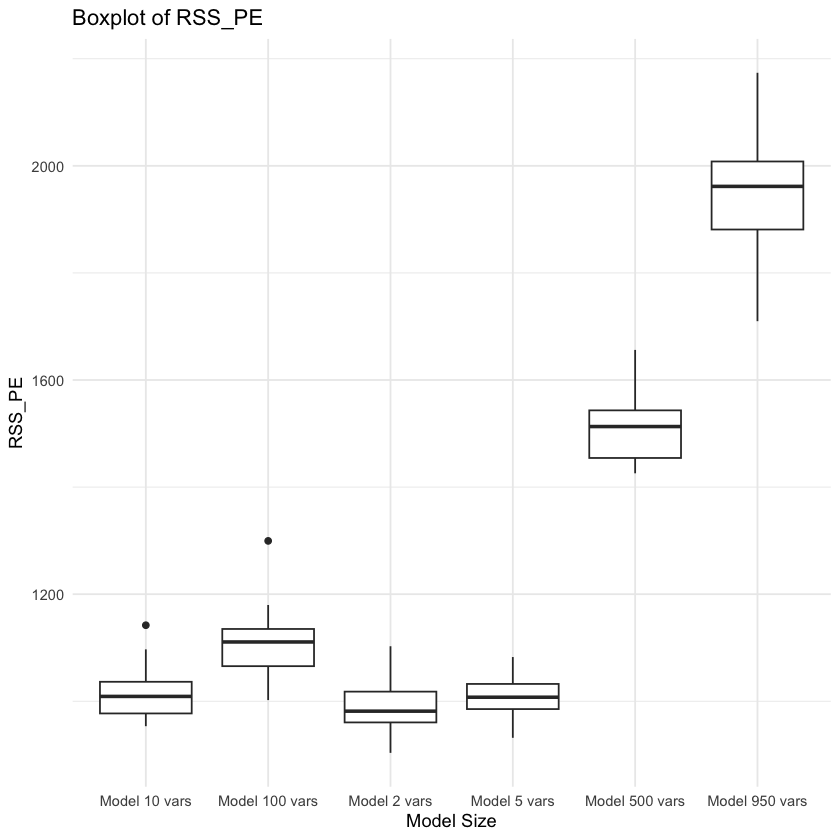

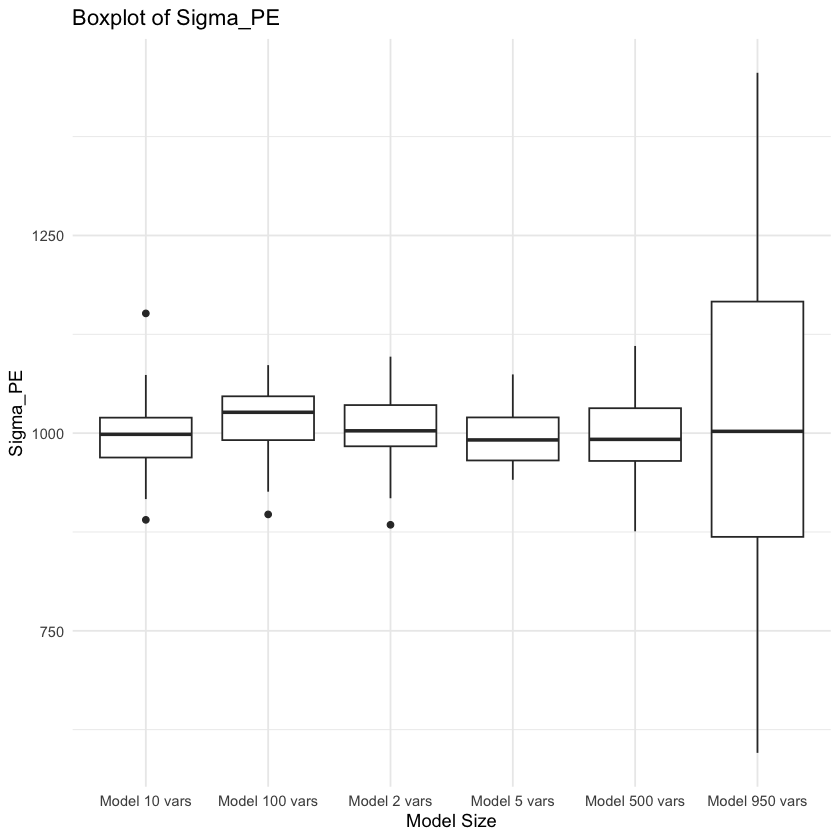

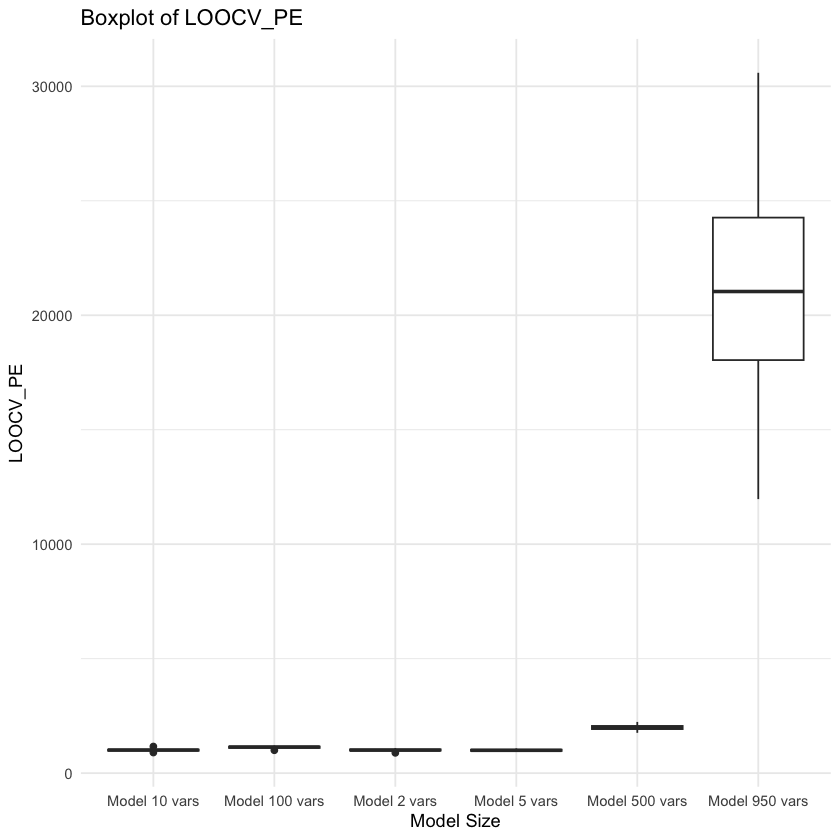

### Project 2: Multiple regression
Generate the design matrix X1000×950 such that its elements are iid random variables from $ N (0,\sigma = \frac{1}{\sqrt {1000}} )$ . Then generate the vector of the response variable according to the model 
$$ Y = X\beta + \epsilon $$
where $ \beta_1 = ... = \beta_k = 6, \beta_k+1 = ... = \beta_p = 0$ with $k = 20$, and $\epsilon ∼ N(0,I).$

 - mBIC2 criterion from the bigstep packag

- Ridge with the tuning parameter selected by cross-validation.

- LASSO with the tuning parameter selected by cross-validation (consider the results for lambda.1se and lambda.min).

- LASSO with the tuning parameter $\lambda = \Phi^{-1}(1-\frac{0.1}{2p})$ (In glmnet you need to divide this by n.Do you know why ?)

- SLOPE with the BH sequence of the tuning parameters $\lambda_i = \Phi^{-1}(1-\frac{0.1}{2p})$
(again in the SLOPE package you need to divide this by n)

In this experiment, we simulated data to test various statistical methods on their ability to correctly identify important features and predict outcomes. We created a dataset with 1000 observations and 950 features, injecting known relationships and random noise. We then applied methods like LASSO, Ridge Regression, mBIC, and SLOPE, evaluating each for accuracy in estimation, prediction, and feature selection efficiency, the result we presented below.

<center>

| Model               | SE       | XSE      | FDP      | TPP |
|---------------------|----------|----------|----------|-----|
| MBIC                | 720      | 753.3481 | 0        | 0   |
| Ridge               | 471.0799 | 334.2392 | 0.9789474| 1   |
| Lasso (1se)         | 134.3679 | 133.7217 | 0.4594595| 1   |
| Lasso (min)         | 105.4818 | 103.9777 | 0.7560976| 1   |
| Lasso (specified)   | 1481.195 | 633.047  | 0.9722222| 1   |
| SLOPE               | 15818.39 | 15988.41 | 0.978903 | 1   |


</center>

lets analysis the result, as we can see, the mBIC model struggled significantly, failing to identify any key features. Ridge Regression identified all necessary signals but also included many irrelevant ones, making it less precise. LASSO using lambda.1se offered a balanced approach with low errors and effective feature selection, while LASSO with lambda.min provided the most accurate predictions, albeit at the cost of including some unnecessary features. The LASSO with a specified lambda performed poorly, with high errors and many irrelevant features. SLOPE had the poorest performance, with very high errors and almost every feature mistakenly identified as important.






